# Визуализация участков классов на электромиограммах
Отрисовываются электромиограммы, на них размечены выявленные классы участков, в данном случае амплитудные артефакты.

In [1]:
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
from pyedflib import EdfReader
import pandas as pd
import numpy as np

In [2]:
PATH='data/'

In [3]:
def read_cls(cls_name='test',path=PATH):
    """
    Функция читает таблицу(pd.Dataframe) с размеченными классами из файла
    """
    data=pd.read_csv(PATH+'cp_'+cls_name+'.csv',index_col='Index')
    return data

In [4]:
def plot_channel(filename,chnum,path=PATH,classes=None):
    """
    Функция отрисовывает один канал с размеченными классами
    """
    EDFData=EdfReader(path+filename)
    frq=EDFData.getSampleFrequency(chnum)
    record=EDFData.readSignal(chnum)
    time=[i/frq for i in range(0,len(record))]
    plt.plot(time,record)
    
    #TODO:Сделать по-нормальному
    if type(classes)==type(None):
        print(type(classes))
    else:
        
        for t in classes[classes['Class']==0]['id']:
            plt.axvspan(t-1, t, color='red', alpha=0.5)
    EDFData._close()

In [5]:
def get_channels_list(data):
    """
    Функция получает список каналов из таблицы(pd.DataFrame)
    """
    channels_list=[]
    grdata=data.groupby(['File','Channel']).count()
    for (i,k) in list(zip(grdata.index.labels[0],grdata.index.labels[1])):
        channels_list.append((grdata.index.levels[0][i],grdata.index.levels[1][k]))
    return channels_list

In [6]:
def plot_all_channels(data,path=PATH):
    """
    Функция прорисовывает все каналы, и размечает классы
    """
    channels_list=get_channels_list(data)
    n_channels=len(channels_list)
    plt.rcParams["figure.figsize"] = (20,4*n_channels)
    for n,(file,chnum) in enumerate(channels_list):
        plt.subplot(n_channels,1,n+1)
        #TODO: Сделать нормально
        plot_channel(file,chnum,classes=data[(data['File']==file)&(data['Channel']==chnum)])
    

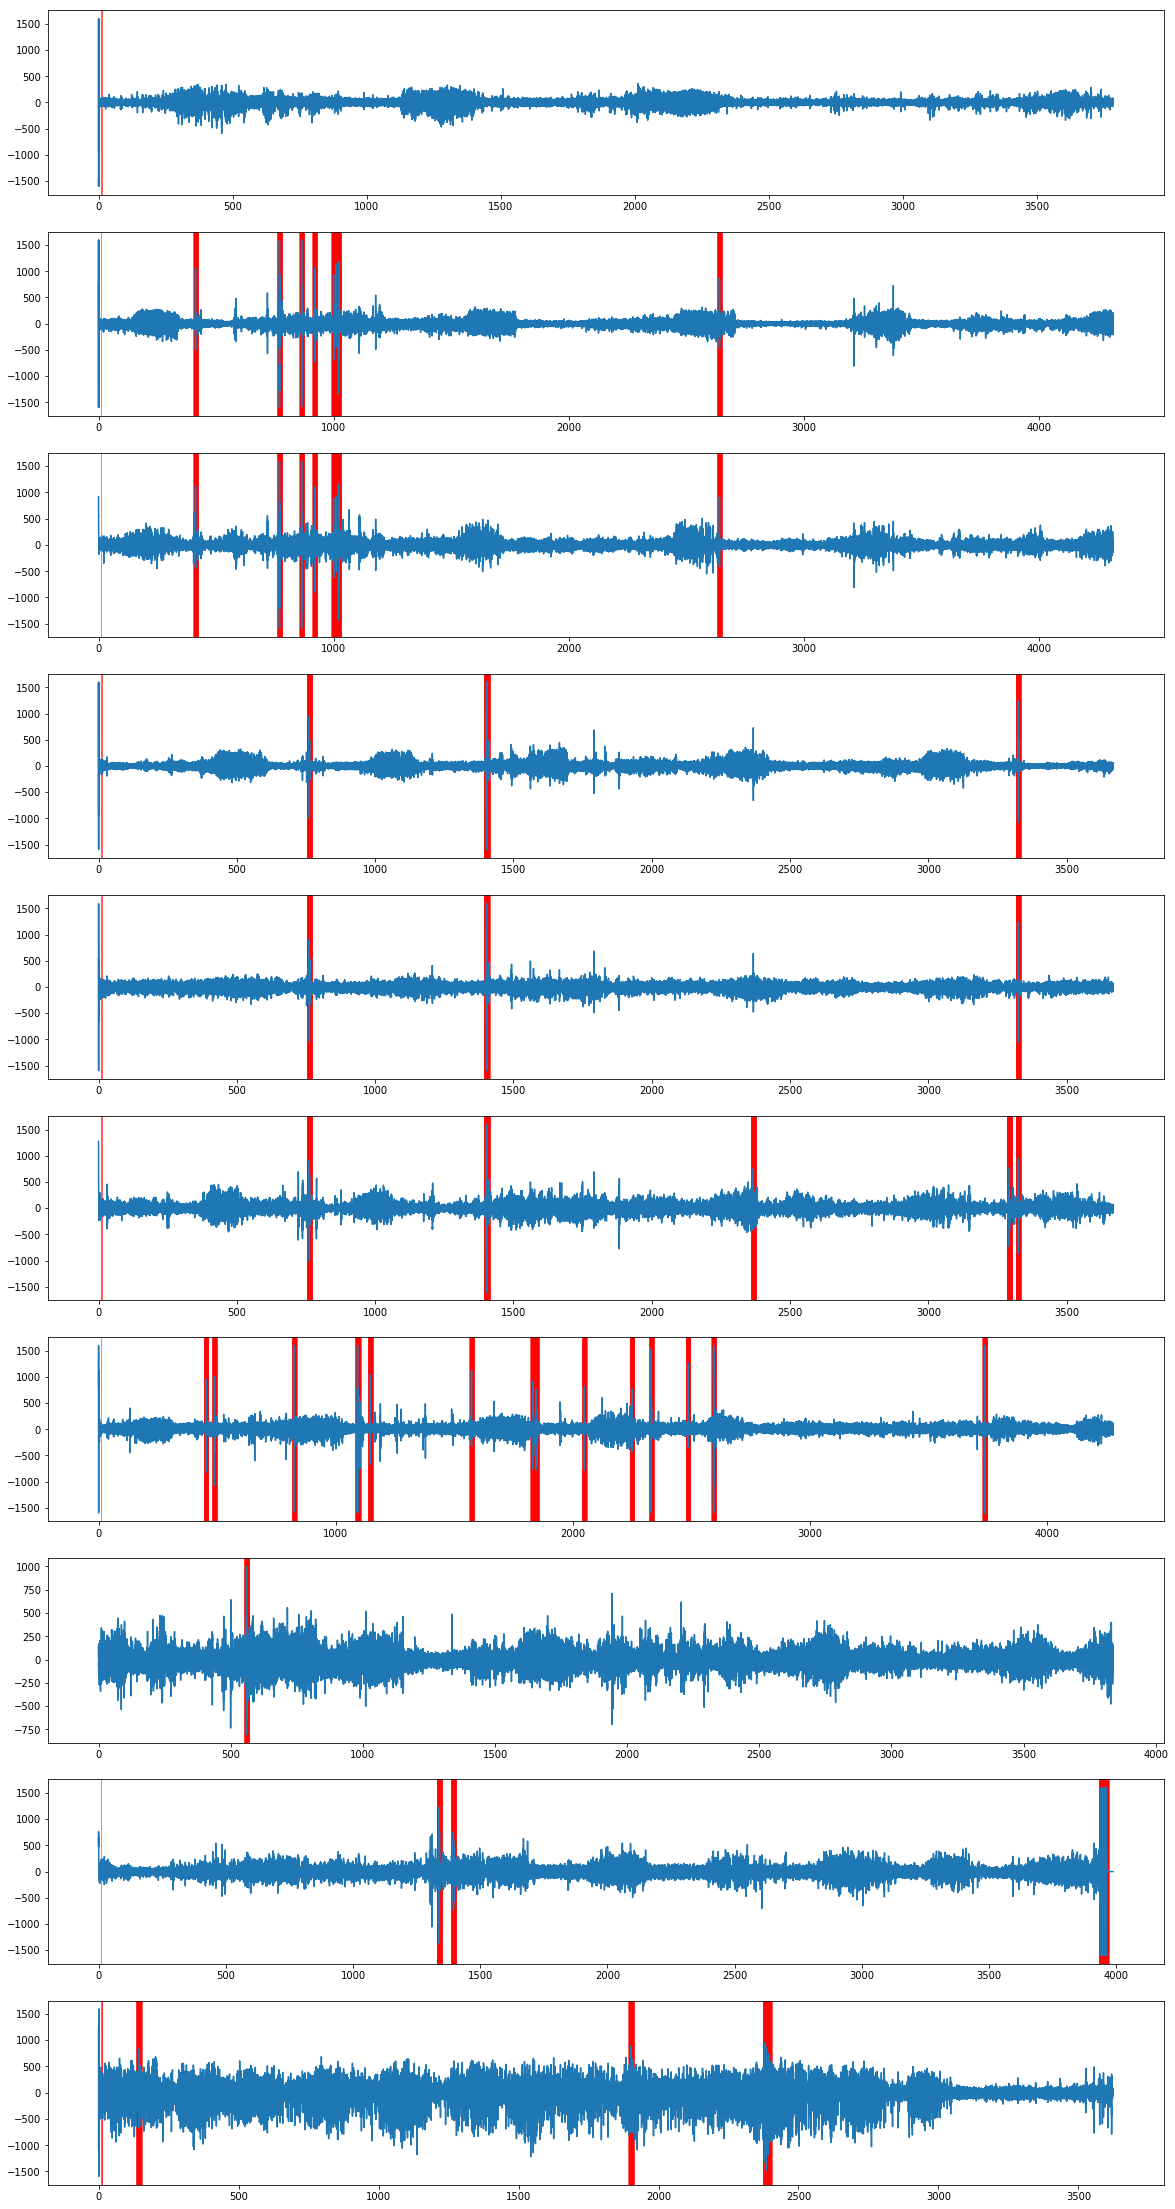

In [7]:
data=read_cls()
plot_all_channels(data)